# PUI2017 HW4 Assignment 3
### sac820@nyu.edu

_Reproduce the results of the [evaluation](http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf ) of the New York Center for Employment Opportunities Program_ 

<center>![](files/ceo_results_table.png)<center>

In [1]:
import os
import sys
import numpy as np
import pylab as pl
from evalChisq import evalChisq

%pylab inline

from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


# PART 1: EMPLOYMENT

## 1. State the null hypothesis


**NULL HYPOTHESIS:** the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group.
    
**SIGNIFICANCE LEVEL:** $p=0.05$

** $H_0: P_0 - P_1 \geq$    0 **
    
** $H_a: P_0 - P_1 $< 0    **
    
    
** $\alpha$ = 0.05    **

** TEST OF PROPORTIONS: ** We use the Binomial distribution since it is a yes/no (Bernoulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job.

** $P_0=0.035, P_1=0.701$**

In [2]:
#The significance level
alpha=0.05


#Convert percentanges to fractions
P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

#First we see if there actually is a positive difference between the two proportions
if P_0 - P_1 >= 0:
    # we are done
    print ("The Null Hypothesis holds.")
else:
    print ("We must assess the statistical significance.")

#The sample sizes
n_0 = 409
n_1 = 564

#Multiply the proportions by the sample sizes to get real counts
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1


We must assess the statistical significance.


 **ASESSING WHAT TEST TO USE:** We have samples of categorical data. That means we have two options of either a Z test or a chi-square test.


## 2. Perform Z-test

**The Z test compares the standard deviation of the expected distribution and the observed result. It tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality_. **


### Two Sample Z-Test for the Difference between Proportions

**A two-sample z-test can be used to test the difference between two population proportions $p_1$ and $p_2$ when a sample is randomly selected from each population.**


The null hypothesis is:

$$H_0: p_1 - p_2 = 0$$


The proportion of successes in the two samples combined is:

$$\hat{p} = \dfrac{Y_1 + Y_2}{n_1 + n_2}$$


The test statistic is:

$$Z = \dfrac{(\hat{p_1} - \hat{p_2}) - 0}{\sqrt{\hat{p}(1-\hat{p})(\dfrac{1}{n_1} + \dfrac{1}{n_2})}}$$


In [3]:
#Define the sample proportion
sampleProportion = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sampleProportion)

0.421047276465


**Standard deviation of the sampling distribution is Binomial. Thus, we must calculate the binomial standard deviation**

For 1 sample:

$$\sqrt{\frac{p(1 - p)}{n}}$$

For 2 samples: 

$$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n_0} + \frac{ \hat{p}(1 - \hat{p})} {n_1} }$$


[Pooled sample proportion](http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP):

$$\hat{p} =\frac{p_{0}  n_{0} + p_{1}  n_{1}}{n_0+n_1}$$


Standard Error:

$$SE = \sqrt{ \hat{p} ( 1 - \hat{p} ) \Big[ \frac{1}{n_1} + \frac{1}{n_2} \Big] }$$


In [6]:
#Calculate pooled sample proportion
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)

#Calculate standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 

<center>**Z score: how many standard deviations away from the population parameter is my statistic?**<center>

$~$

$$z=\frac{P_1-P_0}{\sigma}$$

In [10]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z)

20.7697865408


N.B.: Using  $p_0-p_1$ or $p_1-p_0$ at the numerator is equivalent because the standardized normal value of z has mean $0$ so that we can use the absolute value of the z score. Or, equivalently, we can look for $P[Z<z]$ if z is positive and $P[Z>z]$ if z is negative.

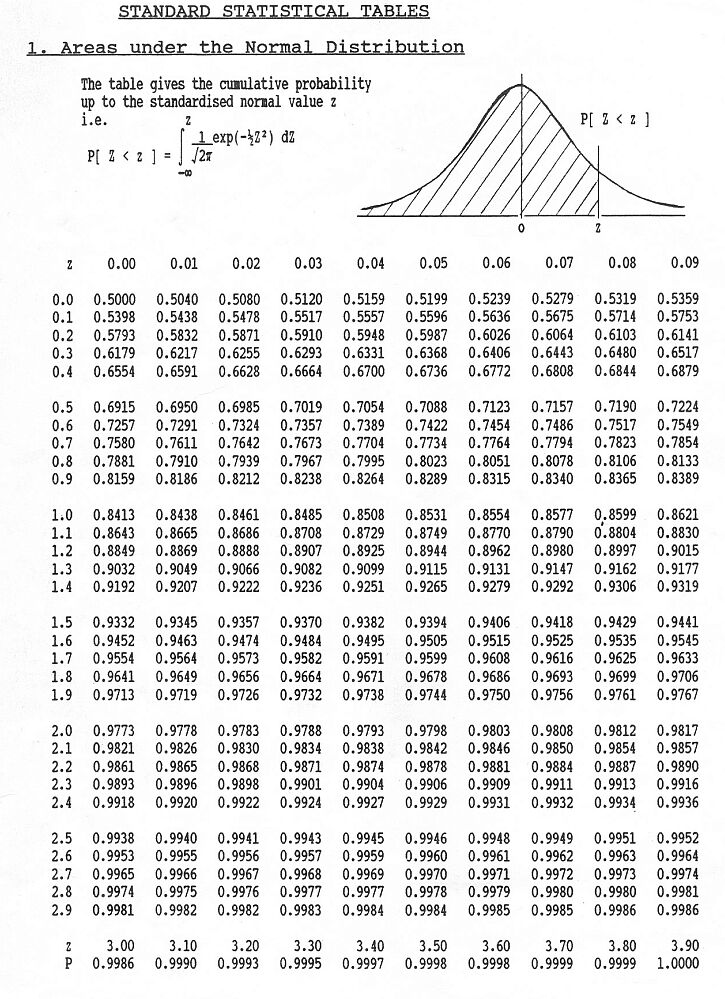

In [8]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

In [12]:
calculatedP = 1 - 0.9984


def report_result(p,a):
    print ('Is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('The Null hypothesis is {}'.format(\
                            'rejected.' if p < a  else 'not rejected.') )

    
report_result(calculatedP, alpha)

Is the p value 0.00 smaller than the critical value 0.05?
YES!
The Null hypothesis is rejected.


## 3. Perform $\chi^2$ test



|Employed in subsidized job |     Employed          | Not employed     |                   
|---------------------------|:---------------------:|------------------|---------------------------|
| test sample               | $0.701*564$           | $0.299*564$      | 564                       |
| control sample            | $0.035*409$           | $0.965*4.09$     | 409                       |
|                           |                       |                  |                           |
| total                     | 409.679               |  562.912         | 973                       |

In [5]:
nTotal = 973
sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])
chisqEval = evalChisq(sample_values)
print(chisqEval)

436.223462575


This number must be compared to the $\chi^2$ distribution. You must calculate the number of degrees of freedom for this experiment. 

**Degrees Of Freedom = Number of observations - Number of Independent Variables**

So here DOF = 1. Now you can look at the table below and draw conclusions about the rejection of the Null Hypothesis.

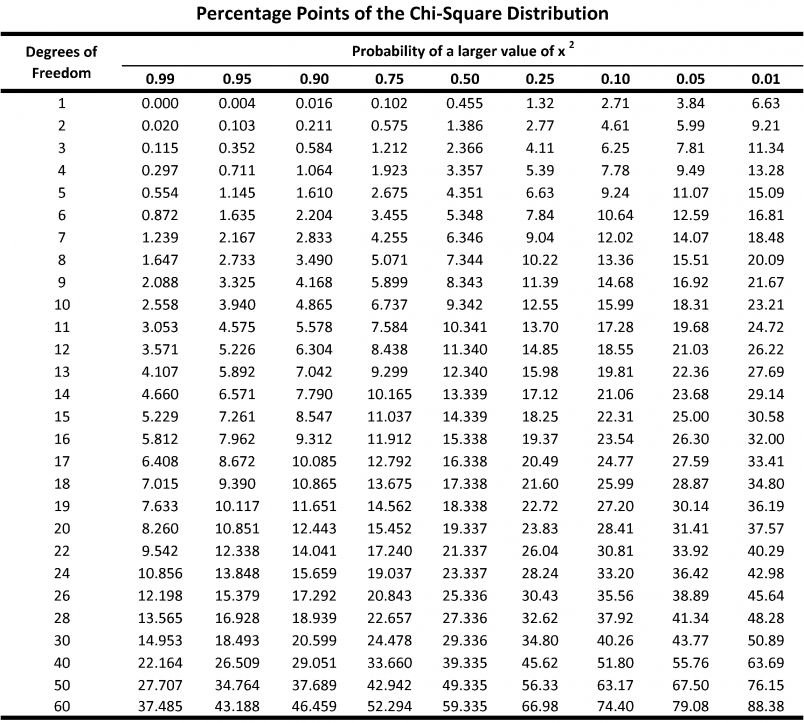

In [4]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

**If we have a significance level of 0.05, then the statistic we need with one degree of freedom is 3.84.**
<br>
Thus we want to see if our statistic is greater or smaller than 3.84.


In [6]:
if chisqEval > 3.84:
    print("The difference between the two proportions is statistically significant. We reject the Null Hypothesis.")
else:
    print("The difference between the two proportions is not statistically significant. We cannot reject the Null.")

The difference between the two proportions is statistically significant. We reject the Null Hypothesis.


**Because the $\chi^2$ statistic is greater than 3.84, we can reject the null hypothesis.**

# PART 2: RECIDIVISM

## 1. State the null hypothesis

**NULL HYPOTHESIS:** the % of former prisoners that are convicted of a felony is the same or higher for candidates who were enrolled in the CEO program as for those in the control group.
    
**SIGNIFICANCE LEVEL:** $p=0.05$


** $H_0: P_0 - P_1 \geq$    0 **
    
** $H_a: P_0 - P_1 $< 0    **
    
    
** $\alpha$ = 0.05    **

**TEST OF PROPORTIONS:** We use the Binomial distribution since it is a yes/no (Bernoulli) test for each subject: the former inmate was or was not convicted of a felony.

**$P_0 = 10.0,  P_1= 11.7$**

In [12]:
#The significance level
alpha=0.05


#Convert percentanges to fractions
P_0= 10.0 * 0.01
P_1= 11.7 * 0.01

#First we see if there actually is a positive difference between the two proportions
if P_0 - P_1 >= 0:
    # we are done
    print ("The Null Hypothesis holds.")
else:
    print ("We must assess the statistical significance.")

#The sample sizes
n_0 = 568
n_1 = 409

#Multiply the proportions by the sample sizes to get real counts
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

We must assess the statistical significance.


## 2. Perform Z-test

In [13]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))
zscore = lambda p0, p1, s : (p0 - p1) / s
z = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print (z)

0.84764020522


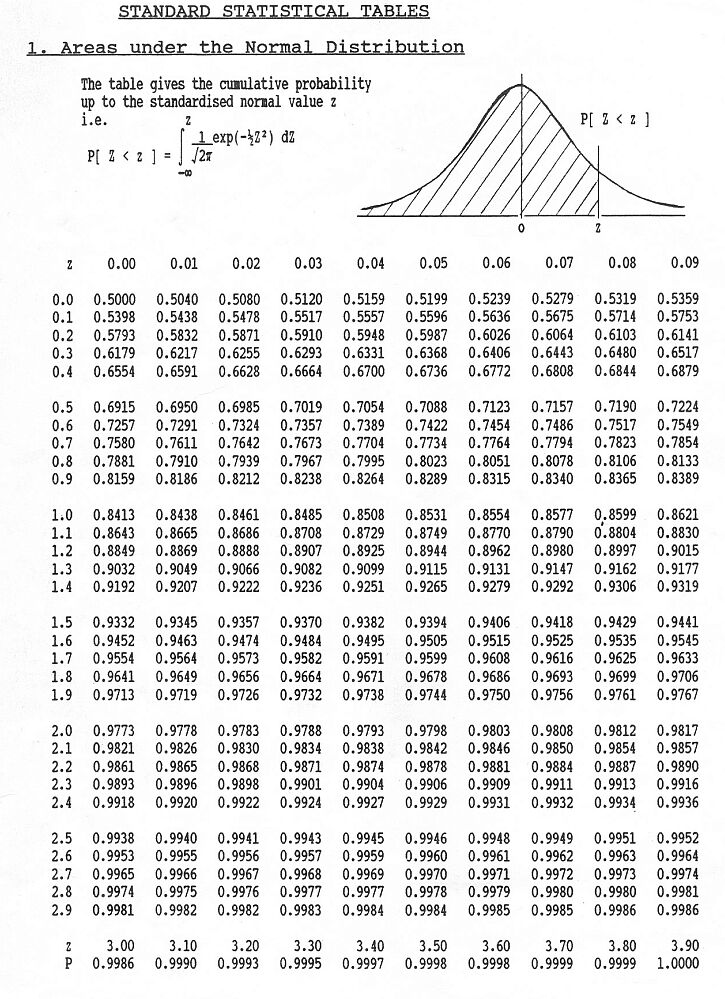

In [10]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

In [14]:
#A z statistic of .847 leads us to .7995 on the table

calculatedP = 1 - .7995

def report_result(p,a):
    print ('Is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('The Null hypothesis is {}'.format(\
                            'rejected.' if p < a  else 'not rejected.') )

    
report_result(calculatedP, alpha)

Is the p value 0.20 smaller than the critical value 0.05?
NO!
The Null hypothesis is not rejected.


## 3. Perform the $\chi^2$ test


Because we have an expectation of what the difference will be, this analysis can also be done with the $\chi^2$ test and the  $\chi^2$ distribution.


**The $\chi^2$ statistics tests are calculated as:**

$$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$$

**For sample fractions:**

$$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$$

Where _i_ indicates the sum over _each cell_. It turns out this quantity is distributed according to a $\chi^2$ distribution, so if we get the $\chi^2$ statistics, we can compare it to the full $\chi^2$ distribution and see how far in the tail it is. The trickiest part is to figure out how to construct the table of values. This is called a _contingency table_.

|                 |     Success         | Failure|    |               
|-----------------|:-------------------:|:-------------------:|---------------------------|
| Test sample     | Number of successes in test    | Number of failures in test    | Number members of test sample |
| Control sample  | Number of successes in control | Number of failures in control | Number members of control sample| 
|                 | Total successes                |  Total failures               | Number of all members         

**FOR EACH CELL:**
** expected_cell = $\frac{row~tot * col~tot}{total}$**

 
For each cell, the expected ratio is the product of the total of all rows and all columns, divided by the total.

|Convicted of a felony      |     Yes   | No        |                   
|---------------------------|-----------|-----------|----------------|
| Test sample               |.100 * 568 |.900 * 568 |  568           |
| Control sample            |.117 * 409 |.883 * 409 |  409           |
|                           |           |           |                |
| Total                     | 105       | 872       |  977           |

In [16]:
totalN = n_0 + n_1

sample_values = np.array([[0.100 * 568, 0.117 * 409], [0.900 * 568, 0.883 * 409]])

chisqEval = (evalChisq(sample_values))
print(chisqEval)

0.718493917505


This number must be compared to the $\chi^2$ distribution. You must calculate the number of degrees of freedom for this experiment. 

**Degrees Of Freedom = Number of observations - Number of Independent Variables**

So here DOF = 1. Now you can look at the table below and draw conclusions about the rejection of the Null Hypothesis.

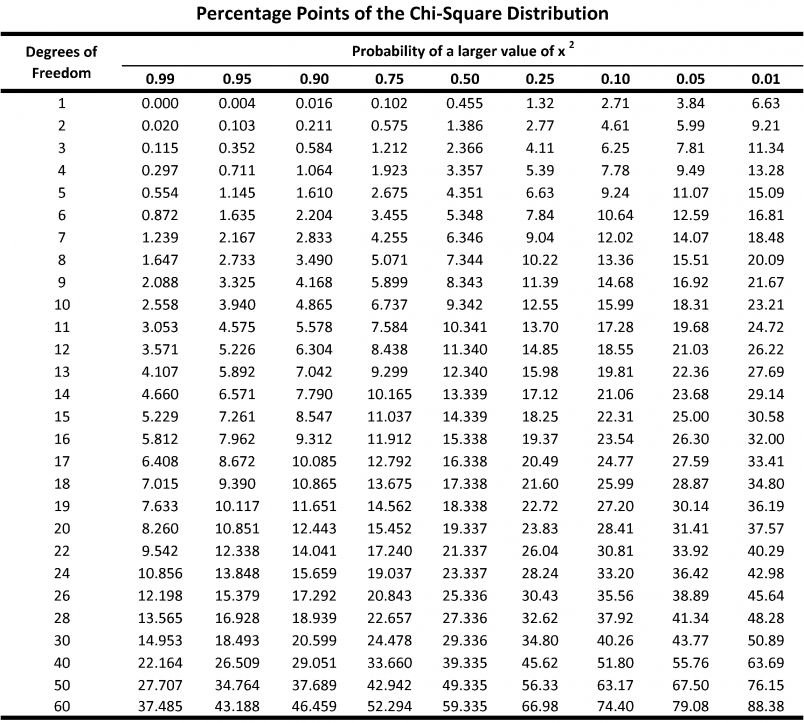

In [12]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

In [17]:
#Cutoff for an alpha of 0.05 with 1 degree of freedom in a Chi Sq distribution is going to be 3.84. 
#Thus, if our statistic is greater than 3.84, then it is significantly different.

if chisqEval > 3.84:
    print("The proportions are significantly different.")
else:
    print("The proportions are not significantly different")
    


The proportions are not significantly different
